# Neural Network From Scratch - Titanic.csv

### MLP Architecture

A MLP (Multilayer perceptron) is a feedfoward neural network that is capable of distinguishing non linearly seperable data. In addition, the network uses non linear activation function as it is able to learn non linear data patterns; Alot of modern architecture utulizies backpropogation for training. 

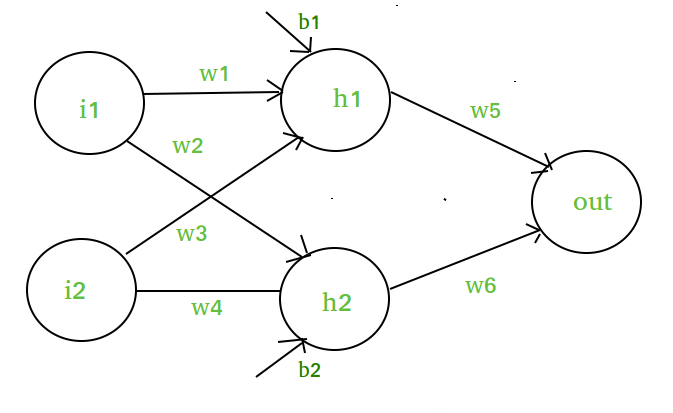


[image link](https://www.geeksforgeeks.org/activation-functions-neural-networks/)

Example above
- Input layer: 2 inputs $i_1$ and $i_2$
- Hidden layer: 2 neurons $h_1$ and $h_2$
- Output layer: 1 neuron


**FeedForward Propogation**: Inputs multiplied by weights to obtain outputs (inputs-to-output): feedforward. The feedfoward propogation is going through the entire net by multiplying the weights through input to layers, layers to output where each layer having neurons that have weights + biases. At the end of each epoch, we compare the obtained outputs to the targets to form the error. 

**Activation Function**: A mathematical function applied on top of each neuron introducing non linearity within your model. This is important as non linear functions are able to solve problems beyond linearly seperablility. 
Example, given the neural network structure above, an activation function would occur assuming you are propogating to $h_1$, where $ z_{h_1} = (w_1i_1 + w_3i_2) + b_1$, and applying ReLU activation function, defined as $\sigma(x) = max(0,x)$, will get $h_1 = \sigma(z_{h_1}) = \sigma(w_1i_1 + w_3i_2 + b_1)$

**Backpropogation**: An optimization process that aims at updating parameters of your neural network after a feedfoward propogation. The idea is to compute the gradient of the loss function concerning the weights and biases of each unit in the network. Then, we use the gradients obtained to update the parameters such that the loss we compute at the new value is less than the loss at the current value. The loss decreases by iteratively adjusting the weights and biases based on the obtained gradients, and the network gradually learns to make better predictions.

*Gradient Descen*t is an iterative optimization algorithm for finding the minimum of a function; in our case we want to minimize th error function. To find a local minimum of a function using gradient descent

$$
W_x^* = W_x - \eta(\frac{\partial C}{\partial W_x})
$$

where 
- $W_x^* =$ New weight
- $W_x =$ Old Weight
- $\frac{\partial C}{\partial W_x} =$ Derivative of error respect to the weight

In [1]:
# import math frameworks
import numpy as np
import pandas as pd

In [2]:
# read titanic data
titanic = pd.read_csv("/Users/everestyoung/Desktop/Projects/nn from scratch/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# replace na values as modes and median
modes = titanic.mode().iloc[0]
titanic["Age"].fillna(titanic["Age"].median())
titanic.fillna(modes,inplace = True)

In [4]:
# select relevant variables
titanic = titanic[["Survived","Sex","Age","SibSp","Parch","Fare","Pclass","Embarked"]]
titanic.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Pclass,Embarked
0,0,male,22.0,1,0,7.2500,3,S
1,1,female,38.0,1,0,71.2833,1,C
2,1,female,26.0,0,0,7.9250,3,S
3,1,female,35.0,1,0,53.1000,1,S
4,0,male,35.0,0,0,8.0500,3,S


In [5]:
# right skewed distribution -> log transform to mimic gauss dist
titanic["LogFare"] = np.log(titanic["Fare"] + 1)
titanic = titanic.drop(columns = ["Fare"])

In [6]:
# standardize age variable based on max age, nn performs more effeciently
titanic["Age"] = titanic["Age"] / max(titanic["Age"])

In [7]:
# one hot encode categorical variables
titanic = pd.get_dummies(titanic,columns = ["Sex","Embarked","Pclass"],dtype = "int")
titanic.head()

,Survived,Age,SibSp,Parch,LogFare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0.2750,1,0,2.110213,0,1,0,0,1,0,0,1
1,1,0.4750,1,0,4.280593,1,0,1,0,0,1,0,0
2,1,0.3250,0,0,2.188856,1,0,0,0,1,0,0,1
3,1,0.4375,1,0,3.990834,1,0,0,0,1,1,0,0
4,0,0.4375,0,0,2.202765,0,1,0,0,1,0,0,1


### 1. MLP using `torch`

In [8]:
import torch
import torch.nn as nn

In [9]:
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader,TensorDataset

X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop(["Survived"],axis = 1), 
                                                    titanic["Survived"], test_size=0.2, 
                                                    random_state=42) # 20% test and set seed 42

In [10]:
X_train_torch = torch.tensor(X_train.values, dtype=torch.float32) # return a 32 bit float tensor
X_test_torch = torch.tensor(X_test.values, dtype=torch.float32)
Y_train_torch = torch.tensor(Y_train.values, dtype=torch.float32).view(-1,1)
Y_test_torch = torch.tensor(Y_test.values, dtype=torch.float32).view(-1,1)

train_df = TensorDataset(X_train_torch,Y_train_torch) 
test_df = TensorDataset(X_test_torch,Y_test_torch)
train_loader = DataLoader(train_df,batch_size=64, shuffle=True) # batching and shuffling using dataloader
test_loader = DataLoader(test_df,batch_size = 64,shuffle = True)

In [11]:
class MLP(nn.Module):
    def __init__(self,n_features, n_hidden):
        super().__init__()
        self.layer = nn.Linear(n_features,n_hidden)
        self.relu = nn.ReLU()
        self.output = nn.Linear(n_hidden,1) # output 1 for classification
        self.sigmoid = nn.Sigmoid() # sigmoid confines output 0 to 1
        
    def forward(self,x):
        x = self.relu(self.layer(x))
        x = self.sigmoid(self.output(x))
        return x

In [36]:
np.random.seed(42)

model = MLP(X_train.shape[1],7)

criterion = nn.BCELoss() # loss using binary cross entropy
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # Backpropagation for training
epochs = 10000

for epoch in range(epochs):
    optimizer.zero_grad() # each epoch reset gradients 0
    outputs = model(X_train_torch)
    loss = criterion(outputs, Y_train_torch) # calculate loss
    loss.backward() # backpropagate
    optimizer.step() # update parameters
    if epoch % 2000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}") # display loss each epoch

Epoch 0, Loss: 0.7463768720626831
Epoch 2000, Loss: 0.6736335158348083
Epoch 4000, Loss: 0.635322093963623
Epoch 6000, Loss: 0.5970960259437561
Epoch 8000, Loss: 0.5560582280158997


In [22]:
def accuracy(y_true,y_pred):
    # Convert probabilities to binary outputs (0 or 1) with threshold 0.5
    y_pred_binary = (y_pred > 0.5).float()
    # Calculate the percentage of correct predictions
    accuracy = (y_pred_binary == y_true).float().sum() / y_true.shape[0]
    accuracy = torch.round(accuracy * 100)
    
    return accuracy

In [37]:
model.eval()
with torch.no_grad():
    total_accuracy = 0
    count = 0
    for inputs, labels in test_loader:
        outputs = model(inputs)
        batch_accuracy = accuracy(labels, outputs)
        total_accuracy += batch_accuracy
        count += 1
    average_accuracy = total_accuracy / count
    print(f"Average Test Accuracy: {average_accuracy.item()}%")

Average Test Accuracy: 76.66666412353516%


### 2. MLP From Scratch

**Creating A Simple 3 Layers Neural Network from Scratch**

In [40]:
# initialize parameters
def initialize_parameters(layers):  # 3 layers = [input_size, hidden_size, output_size]
    params = {}
    
    params["w1"] = np.random.randn(layers[0], layers[1])  # initalize w1 with random values from gauss dist -> i x h
    params["b1"] = np.zeros((layers[1],))                 # initliaze bias = 0 -> 1D array
    params["w2"] = np.random.randn(layers[1], layers[2])  # initalize w2 with random values from gauss dist -> i x o 
    params["b2"] = np.zeros((layers[2],))                 # initliaze bias = 0 -> 1D array
    
    return params # return dict with initial parameters

In [41]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [42]:
# define activation function as ReLU  
def ReLU(x):
    y = x * (x > 0)
    return y

In [43]:
# Important for backprop for calculating gradient descent
def dReLU(x):
    return 1. * (x > 0)

In [44]:
# loss - binary cross entropy 
def loss(y_predict,y_actual):
    epsilon = 1e-10
    y_predict = np.clip(y_predict, epsilon, 1 - epsilon) # clip it so we do not get log(0), so y_pred is (eps, 1 - eps)
    
    ce = -np.mean(y_actual * np.log(y_predict) + (1 - y_actual) * np.log(1 - y_predict))
    return ce

In [45]:
# forward prop
def forward_prop(X, params):
    w1 = params["w1"]
    b1 = params["b1"]
    w2 = params["w2"]
    b2 = params["b2"]

    # Forward pass for layer 1
    z1 = np.dot(X, w1) + b1  # (X = 700, i = 12) x (i = 12, h = 7) = (700, 7) i = input, h = hidden, X = rows
    a1 = ReLU(z1)         # activationf = sigma(700, 7)

    # Forward pass for layer 2
    z2 = np.dot(a1, w2) + b2  # (700, 7) x (7, 1) = (700,1) o = output
    y_predict = sigmoid(z2)   # (700, 1)

    store = { # cache the results in dict
        "z1": z1,
        "a1": a1,
        "z2": z2,
        "y_predict": y_predict
    }

    return store
    

In [46]:
def back_prop(X, Y, layers, params, store):
    m = X.shape[0]  # rows
    
    # Retrieve activations and outputs from forward propagation
    a1 = store["a1"]
    y_predict = store["y_predict"]
    
    # Calculate the gradients for the second layer (output layer)
    dz2 = y_predict - Y  # Derivative of the cost function with respect to z2
    dw2 = (1/m) * np.dot(a1.T, dz2)  # Gradient of the cost with respect to w2
    db2 = (1/m) * np.sum(dz2, axis=0)  # Gradient of the cost with respect to b2
    
    # Backpropagation for the first layer
    da1 = np.dot(dz2, params["w2"].T)  # Derivative of the cost with respect to the activations of layer 1
    dz1 = da1 * dReLU(a1)  # Derivative of the cost with respect to z1 (using the derivative of sigmoid)
    dw1 = (1/m) * np.dot(X.T, dz1)  # Gradient of the cost with respect to w1
    db1 = (1/m) * np.sum(dz1, axis=0)  # Gradient of the cost with respect to b1
    
    gradients = { # cache the gradients in dic
        "dW1": dw1,
        "db1": db1,
        "dW2": dw2,
        "db2": db2
    }
    
    return gradients
    

In [47]:
def update_weights(learning_rate,params,gradients):
    
    # update weights 
    params["w1"] -= learning_rate * gradients["dW1"]
    params["b1"] -= learning_rate * gradients["db1"]
    params["w2"] -= learning_rate * gradients["dW2"]
    params["b2"] -= learning_rate * gradients["db2"]
    
    return params

In [48]:
def train(X, Y, layers, epochs, learning_rate=0.1):
    params = initialize_parameters(layers)
    
    for epoch in range(epochs):
        # Forward propagation
        store = forward_prop(X, params)
        
        # Backpropagation
        gradients = back_prop(X, Y, layers, params, store)
        
        # Update weights
        params = update_weights(learning_rate, params, gradients)
        
        # Print loss every 100 epochs
        if epoch % 2000 == 0:
            y_predict_vals = store['y_predict']
            loss_value = loss(y_predict_vals, Y)
            print(f"Epoch: {epoch}, Loss: {loss_value}")
    
    return params

In [49]:
# train
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop(["Survived"],axis = 1), titanic["Survived"], test_size=0.2, random_state=42) # 20% test and set seed 42
X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.values.reshape(-1, 1)  # reshape Y_train to be 2D
Y_test = Y_test.values.reshape(-1, 1)

new_weights = train(X_train, Y_train, layers=[X_train.shape[1], 7, 1], epochs= 10000)

Epoch: 0, Loss: 0.655199003997824
Epoch: 2000, Loss: 0.4197004470558367
Epoch: 4000, Loss: 0.41713854473960277
Epoch: 6000, Loss: 0.41562268419441956
Epoch: 8000, Loss: 0.41400573659608925


In [50]:
def accuracy_scratch(y_pred,y_actual):
    # Convert probabilities to binary outputs (0 or 1) with threshold 0.5
    y_pred_binary = (y_pred > 0.5).astype(int)
    # Calculate the percentage of correct predictions
    accuracy = np.mean(y_pred_binary == y_actual) * 100
    
    return accuracy

In [51]:
# predict using test dataset using trained weights
test_cache = forward_prop(X_test,new_weights) 
new_y_predict = test_cache["y_predict"]

result = accuracy_scratch(new_y_predict,X_test)
print(f"Test Accuracy: {result:.2f}%")

Test Accuracy: 47.21%
